In [9]:
import cv2
import os

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Pre-processing

In [4]:
def grayScaleConversion(path):
    dict1 = {}
    dict2 = {}
    classes = os.listdir(path)
    for classe in classes:
        pathFile = path + '/' + classe
        images = os.listdir(pathFile)
        for i in range(len(images)):
            img = cv2.imread(pathFile +'/' + images[i])
            imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            R, G, B = img[:,:,0], img[:,:,1],img[:,:,2]
            if classe == 'benign':
                dict1[pathFile+ '/' + images[i]] = imgGray
            else:
                dict2[pathFile+ '/' + images[i]] = imgGray       
    return dict1,dict2        

In [5]:
def noiseRemoval(dict1, dict2):
    for key,value in dict1.items() :
        newimg = cv2.medianBlur(value, 1)
        dict1[key] = newimg
    for key,value in dict2.items() :
        newimg = cv2.medianBlur(value, 1)
        dict2[key] = newimg 
    return dict1, dict2

In [6]:
def imageEnhancement(dict1, dict2):
    for key,value in dict1.items() :
        value = np.uint8(cv2.normalize(value, None, 0, 255, cv2.NORM_MINMAX))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        #gray_img_eqhist=cv2.equalizeHist(value)
        value=clahe.apply(value)
        dict1[key] = value
    for key,value in dict2.items() :
        value = np.uint8(cv2.normalize(value, None, 0, 255, cv2.NORM_MINMAX))
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        #gray_img_eqhist=cv2.equalizeHist(value)
        value=clahe.apply(value)
        dict2[key] = value
    return dict1, dict2

In [7]:
path_train = 'data/train'

In [10]:
images = os.listdir(path_train)
print(images)
for i in images:
    print (i)

['benign', 'malignant']
benign
malignant


In [11]:
dict1, dict2 = grayScaleConversion(path_train)

In [12]:
len(dict1)

1440

In [13]:
img1= dict1['data/train/benign/89.jpg']

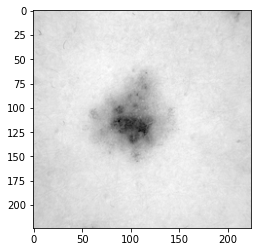

In [14]:
plt.imshow(img1, cmap='gray')

In [169]:
dict1, dict2 = noiseRemoval(dict1, dict2)

In [170]:
dict1

{'data/train/benign/100.jpg': array([[191, 192, 192, ..., 173, 170, 169],
        [189, 191, 188, ..., 169, 172, 173],
        [191, 194, 190, ..., 173, 174, 173],
        ...,
        [165, 169, 167, ..., 159, 162, 164],
        [164, 166, 166, ..., 159, 164, 165],
        [164, 164, 165, ..., 156, 159, 162]], dtype=uint8),
 'data/train/benign/1000.jpg': array([[149, 150, 151, ..., 148, 151, 148],
        [150, 148, 150, ..., 150, 150, 149],
        [148, 149, 149, ..., 154, 150, 148],
        ...,
        [132, 133, 137, ..., 142, 141, 140],
        [128, 130, 132, ..., 138, 135, 136],
        [130, 133, 133, ..., 136, 135, 138]], dtype=uint8),
 'data/train/benign/1001.jpg': array([[154, 155, 161, ..., 147, 150, 151],
        [153, 156, 160, ..., 148, 148, 151],
        [155, 158, 158, ..., 145, 145, 151],
        ...,
        [139, 138, 139, ..., 140, 137, 140],
        [133, 136, 137, ..., 139, 137, 138],
        [132, 135, 136, ..., 139, 140, 141]], dtype=uint8),
 'data/train/beni

In [15]:
img2  = dict1['data/train/benign/89.jpg']

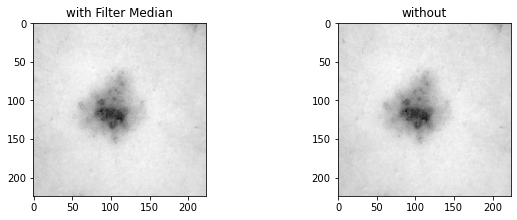

In [16]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 2, 1)
plt.title("with Filter Median")
plt.imshow(img2, cmap='gray')
fig.add_subplot(2, 2, 2)
plt.title("without")
plt.imshow(img1, cmap='gray')

In [17]:
dict1, dict2 = imageEnhancement(dict1, dict2)

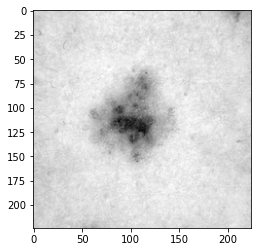

In [18]:
img3  = dict1['data/train/benign/89.jpg']
plt.imshow(img3,cmap='gray')

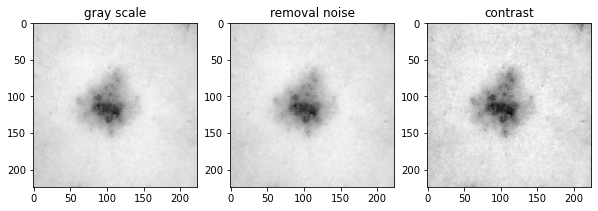

In [19]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 3, 1)
plt.title("gray scale")
plt.imshow(img1, cmap='gray')
fig.add_subplot(2, 3, 2)
plt.title("removal noise")
plt.imshow(img2, cmap='gray')
fig.add_subplot(2, 3, 3)
plt.title("contrast")
plt.imshow(img3, cmap='gray')

## Segmentation

In [20]:
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import threshold_otsu
from skimage import io,color

In [23]:
def segment(img):
    # Otsu's binarization algorithm:
    ret1, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #plt.imshow
    #  Blurs the image using a Gaussian filter to eliminate noise
    gray_image_blurred = cv2.GaussianBlur(img, (25, 25), 0)

    # Calculate histogram after filtering:
    hist2 = cv2.calcHist([gray_image_blurred], [0], None, [256], [0, 256])

    # Otsu's binarization algorithm:
    ret2, th2 = cv2.threshold(gray_image_blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    return th2

(224, 224)


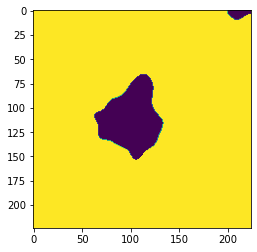

In [26]:
plt.imshow(segment(img3))
print(segment(img3).shape)

In [27]:
def segmentation(dict1, dict2):
    i=0
    for key,value in dict1.items() :
        newValue = segment(value)
        dict1[key] = newValue
        print(i)
        i+=1
    i=0
    for key, value in dict2.items():
        newValue = segment(value)
        dict2[key] = newValue
        print(i)
        i+=1
    return dict1, dict2    

In [28]:
print("start")
dict1, dict2 = segmentation(dict1, dict2)
print("end")

start
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275


687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
728
729
730
731
732
733
734
735
736
737
738
739
740
741
742
743
744
745
746
747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767
768
769
770
771
772
773
774
775
776
777
778
779
780
781
782
783
784
785
786
787
788
789
790
791
792
793
794
795
796
797
798
799
800
801
802
803
804
805
806
807
808
809
810
811
812
813
814
815
816
817
818
819
820
821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841
842
843
844
845
846
847
848
849
850
851
852
853
854
855
856
857
858
859
860
861
862
863
864
865
866
867
868
869
870
871
872
873
874
875
876
877
878
879
880
881
882
883
884
885
886
887
888
889
890
891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936


In [29]:
img4 = dict1['data/train/benign/89.jpg']
print(dict1)

{'data/train/benign/100.jpg': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 'data/train/benign/1000.jpg': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 'data/train/benign/1001.jpg': array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), 'data/train/benign/1002.jpg': array([

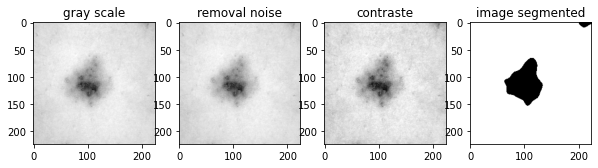

In [30]:
fig = plt.figure(figsize=(10, 7))
fig.add_subplot(2, 4, 1)
plt.title("gray scale")
plt.imshow(img1, cmap='gray')
fig.add_subplot(2, 4, 2)
plt.title("removal noise")
plt.imshow(img2, cmap='gray')
fig.add_subplot(2, 4, 3)
plt.title("contraste")
plt.imshow(img3, cmap='gray')
fig.add_subplot(2, 4, 4)
plt.title("image segmented")
plt.imshow(img4, cmap='gray')

## Features Extraction

### GLCM ( gray-level co-occurrence matrix )

In [31]:
import pandas as pd
import matplotlib.pyplot as pltHomogeneity
from skimage.feature import greycomatrix, greycoprops
from skimage import io,color

In [40]:
def GLCM(img):
    GLCM = greycomatrix(img,[1],[0,np.pi/4,np.pi/2,3*np.pi/4])
    Contrast = greycoprops(GLCM,'contrast')[0,0]
    ASM = greycoprops(GLCM,'ASM')[0,0]
    Energy = greycoprops(GLCM,'energy')[0,0]
    Homogeneity = greycoprops(GLCM,'homogeneity')[0,0]
    correlation = greycoprops(GLCM,'correlation')[0,0]
    return Contrast, ASM, Energy, Homogeneity, correlation

In [41]:
Contrast, ASM, Energy, Homogeneity, correlation = GLCM(img4)

In [42]:
Contrast

249.93593850096093

In [43]:
ASM

0.8565503761253341

In [44]:
Energy

0.9255000681390219

In [45]:
correlation

0.9724706492832591

In [46]:
Homogeneity

0.9961563691677029

In [49]:
def featuresExtraction(dict1, dict2):
    df=pd.DataFrame(columns=['Contrast','ASM','Energy','Homogeneity','correlation','outcome'])
    i=0
    for key, value in dict1.items():
        Contrast, ASM, Energy, Homogeneity, correlation = GLCM(value)
        df.loc[len(df.index)] = [Contrast, ASM, Energy, Homogeneity, correlation, 'begnin']
        print(i)
        i+=1
    i=0    
    for key, value in dict2.items():
        Contrast, ASM, Energy, Homogeneity, correlation = GLCM(value)
        df.loc[len(df.index)] = [Contrast, ASM, Energy, Homogeneity, correlation, 'malignant']
        print(i)
        i+=1
    return df  

In [48]:
df = featuresExtraction(dict1, dict2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [50]:
df.shape

(2637, 6)

In [51]:
df.tail(20)

,Contrast,ASM,Energy,Homogeneity,correlation,outcome
2617,969.803511,0.631819,0.794870,0.985086,0.957874,malignant
2618,715.962324,0.598627,0.773710,0.988990,0.971803,malignant
2619,628.745095,0.714248,0.845132,0.990331,0.965008,malignant
2620,969.803511,0.619018,0.786777,0.985086,0.959320,malignant
2621,1325.181174,0.524201,0.724017,0.979621,0.955292,malignant
2622,839.628543,0.664071,0.814906,0.987088,0.960048,malignant
2623,1054.417241,0.621812,0.788550,0.983785,0.955252,malignant
2624,683.418582,0.497411,0.705274,0.989490,0.978669,malignant
2625,872.172285,0.689685,0.830473,0.986587,0.954858,malignant
2626,1343.405669,0.499051,0.706436,0.979340,0.957023,malignant


In [52]:
df.to_csv('features_train_KC.csv')

## Classification

In [53]:
from sklearn.svm import SVC

In [54]:
from sklearn.svm import LinearSVC

In [55]:
y = df['outcome'].map({"begnin":0,"malignant":1})

In [56]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2632    1
2633    1
2634    1
2635    1
2636    1
Name: outcome, Length: 2637, dtype: int64

In [57]:
df = df.drop(['outcome'], axis=1)

In [58]:
x = df

In [59]:
x

,Contrast,ASM,Energy,Homogeneity,correlation
0,273.367433,0.788345,0.887888,0.995796,0.979736
1,182.244955,0.822519,0.906928,0.997197,0.983956
2,453.008889,0.572851,0.756869,0.993033,0.983422
3,929.449271,0.535947,0.732084,0.985706,0.968234
4,525.906871,0.507967,0.712718,0.991912,0.983302
...,...,...,...,...,...
2632,1727.421825,0.474179,0.688606,0.973435,0.946866
2633,997.140255,0.693137,0.832548,0.984666,0.947495
2634,635.253844,0.499478,0.706737,0.990231,0.980097
2635,372.300408,0.710599,0.842971,0.994275,0.979819


In [60]:
svclassifier = SVC(kernel = 'rbf')
model = svclassifier.fit(x, y)

In [61]:
LSVM = LinearSVC(penalty='l1', loss='squared_hinge', C=1.0, dual=False)
model2 = LSVM.fit(x, y)

## Test data

In [62]:
path_test = 'data/test'

## Pre-processing

In [63]:
dict_test1, dict_test2 = grayScaleConversion(path_test)

In [64]:
dict_test1, dict_test2 = noiseRemoval(dict_test1, dict_test2)

In [65]:
dict_test1, dict_test2 = imageEnhancement(dict_test1, dict_test2)

## Sigmentation

In [66]:
dict_test1, dict_test2 = segmentation(dict_test1, dict_test2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

## Features Extraction

In [67]:
df_test = featuresExtraction(dict_test1, dict_test2)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [68]:
df_test.head(20)

,Contrast,ASM,Energy,Homogeneity,correlation,outcome
0,117.157471,0.914837,0.956471,0.998198,0.978387,begnin
1,486.854380,0.611889,0.782234,0.992513,0.980332,begnin
2,731.583320,0.503621,0.709662,0.988749,0.976815,begnin
3,803.179552,0.488841,0.699172,0.987648,0.975274,begnin
4,466.026385,0.615196,0.784345,0.992833,0.981024,begnin
5,151.002963,0.936761,0.967864,0.997678,0.961882,begnin
6,1619.376602,0.589967,0.768093,0.975096,0.935441,begnin
7,400.938901,0.709506,0.842322,0.993834,0.978317,begnin
8,946.372017,0.645523,0.803444,0.985446,0.957227,begnin
9,411.352899,0.681125,0.825303,0.993674,0.979762,begnin


In [69]:
df_test.tail(20)

,Contrast,ASM,Energy,Homogeneity,correlation,outcome
640,312.419923,0.815609,0.903111,0.995195,0.973250,malignant
641,361.886411,0.825618,0.908635,0.994435,0.967039,malignant
642,1424.114150,0.486277,0.697336,0.978099,0.955517,malignant
643,1615.471352,0.497627,0.705427,0.975157,0.948045,malignant
644,813.593550,0.677799,0.823286,0.987488,0.959619,malignant
645,1888.838785,0.472232,0.687191,0.970953,0.941854,malignant
646,1532.159373,0.490794,0.700567,0.976438,0.951538,malignant
647,1158.557215,0.497660,0.705451,0.982183,0.963252,malignant
648,679.513333,0.694525,0.833382,0.989550,0.964656,malignant
649,467.328135,0.707436,0.841092,0.992813,0.974822,malignant


In [70]:
df_test.to_csv('features_test_KC.csv')

## Prediction

In [71]:
y_test = df_test['outcome'].map({"begnin":0,"malignant":1})
df_test = df_test.drop(['outcome'], axis=1)
x_test =  df_test

In [72]:
y_predict = model2.predict(x_test)

In [73]:
y_predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [74]:
y_test = np.asarray(y_test)
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
accuracy = model2.score(x_test,y_test)

In [76]:
accuracy

0.7106060606060606